# Exploratory Analysis

In [1]:
#To turn on inline plotting
%matplotlib inline

#For Array processing
import numpy as np

#For exploratory analysis
import pandas as pd
from pandas import Series, DataFrame

#For Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#For time related functions
import time

#To set default figure size
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)

from IPython.display import display, HTML

/usr/lib64/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/usr/lib64/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/usr/lib64/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/usr/lib64/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/usr/lib64/python2.7/site-packages/pandas/core/indexes/base.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility

### Data Load

In [2]:
data_path = "./"

class_labels = ["negative", "somewhat negative", "neutral", "somewhat positive", "positive"]

train_df = pd.read_csv(data_path+"train.csv",usecols=["ReviewText","Rating"])
test_set1_df = pd.read_csv(data_path+"test1_generic_reviews.csv",usecols=["ReviewText"])
test_set2_df = pd.read_csv(data_path+"testB_dell_reviews.csv",usecols=["ReviewText"])

### Samples of the loaded data

In [3]:
print ("Sample data from Training dataset \n")
display(train_df.head())
print(train_df.shape)
print ("\n Sample data from Test dataset 1 \n")
display(test_set1_df.head())
print(test_set1_df.shape)
print ("\n Sample data from Test dataset 2 \n")
display(test_set2_df.head())
print(test_set2_df.shape)

Sample data from Training dataset 



ReviewText  Rating
0  We got this GPS for my husband who is an (OTR)...       5
1  I'm a professional OTR truck driver, and I bou...       1
2  Well, what can I say.  I've had this unit in m...       3
3  Not going to write a long review, even thought...       2
4  I've had mine for a year and here's what we go...       1

(1672297, 2)

 Sample data from Test dataset 1 



ReviewText
0  Yesterday I spent over an hour playing with a ...
1  I was looking for a light weight cable to go f...
2  There appears to be an engineering flaw in the...
3  They aren't wide-angle as advertised. They don...
4  The angled picture of the ends of this cable m...

(5000, 1)

 Sample data from Test dataset 2 



ReviewText
0  Right out of the box there was a problem with ...
1  I am a college student who is studying to beco...
2  Damn thing doesnt work....2 years and screen s...
3  I had to return this computer because of the i...
4  My son's computer was damaged in January of 20...

(2768, 1)


### Descriptive details of the train and test data frames

In [4]:
print ("Train Data Description \n")
display(train_df.describe(include='all'))
print ("\nTest Dataset 1 Description \n")
display(test_set1_df.describe(include='all'))
print ("\nTest Dataset 2 Description \n")
display(test_set2_df.describe(include='all'))

Train Data Description 



ReviewText        Rating
count       1671238  1.672297e+06
unique      1670299           NaN
top     works great           NaN
freq             37           NaN
mean            NaN  4.222765e+00
std             NaN  1.185727e+00
min             NaN  1.000000e+00
25%             NaN  4.000000e+00
50%             NaN  5.000000e+00
75%             NaN  5.000000e+00
max             NaN  5.000000e+00


Test Dataset 1 Description 



ReviewText
count                                                4996
unique                                               4996
top     It is a great product. It works quite well. It...
freq                                                    1


Test Dataset 2 Description 



ReviewText
count                                                2768
unique                                               2768
top     My sister and I got brand new Midnight Company...
freq                                                    1

### General stats of the data

In [5]:
def print_gen_stats(dataset,identifier):
    """
    This method is used print general statistics.
    
    Arguments:
        dataset (Pandas DataFrame): Dataframe for which the stats needs to be printed
        identifier (Str): Indicates the dataframe. Eg: Training dataset, Testset 1 datafrome, Testset 2 dataframe
    Returns: 
        None
    """
    print("No of Records in {}: {} ".format(identifier, dataset.shape[0]))
    
    return None

In [6]:
print_gen_stats(train_df,"Training dataset")
print_gen_stats(test_set1_df,"Testset 1")
print_gen_stats(test_set2_df,"Testset 2")

No of Records in Training dataset: 1672297 
No of Records in Testset 1: 5000 
No of Records in Testset 2: 2768 


### Training data rating distribution

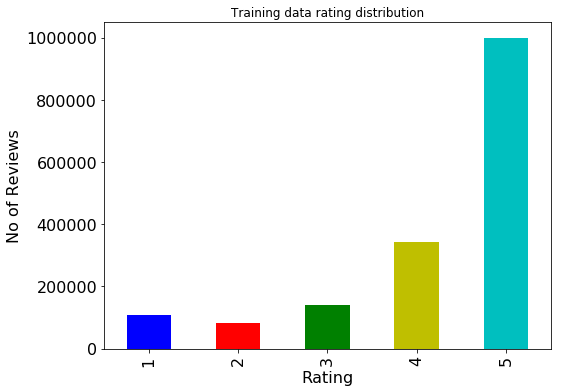

In [7]:
my_colors = ['b', 'r', 'g', 'y', 'c', 'm', 'k', 'pink', 'indigo', 'crimson',
             'gray', 'olivedrab', 'orange', 'maroon', 'magenta', 'violet',
             'yellowgreen', 'lime', 'lightyellow', 'lavender', 'indigo'] * 5

ax=pd.value_counts(train_df['Rating'], sort=False).plot(kind='bar', color=my_colors, title ="Training data rating distribution", figsize=(8, 6), fontsize=16)
ax.set_xlabel("Rating", fontsize=16)
ax.set_ylabel("No of Reviews", fontsize=16)
plt.show()

In [8]:
train_data = pd.read_csv('./train.csv', nrows=3000).drop_duplicates()

#only keeping important variables for analysis
data = train_data[['ReviewText', 'Rating']]
data.head()

ReviewText  Rating
0  We got this GPS for my husband who is an (OTR)...       5
1  I'm a professional OTR truck driver, and I bou...       1
2  Well, what can I say.  I've had this unit in m...       3
3  Not going to write a long review, even thought...       2
4  I've had mine for a year and here's what we go...       1

In [9]:
#creating series of only comment text

comment_text = data['ReviewText']
comment_text.head()

0    We got this GPS for my husband who is an (OTR)...
1    I'm a professional OTR truck driver, and I bou...
2    Well, what can I say.  I've had this unit in m...
3    Not going to write a long review, even thought...
4    I've had mine for a year and here's what we go...
Name: ReviewText, dtype: object

## Data Encoding

We used the bag of words model and tf-idf to encode our data in meaningful ways. We used the stop_words dictionary across all encoding mechanisms to remove irrelevant and overly common words from the bag of words and tf-idf representation before performing our visualizations. However, stop-words was not used when looking at comment and summary lengths so that the correct results were not obscured.

In [10]:
#creating bag of words from comment_text

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

bag_words = count_vect.fit_transform(train_df['ReviewText'].values.astype('str'))

/usr/lib64/python2.7/site-packages/scipy/sparse/lil.py:16: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/usr/lib64/python2.7/site-packages/sklearn/utils/__init__.py:9: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .murmurhash import murmurhash3_32
/usr/lib64/python2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/usr/lib64/python2.7/site-packages/scipy/linalg/__init__.py:202: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/usr/lib64/python2.7/site-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ufuncs import *
/usr/lib64/python2.7/s

In [11]:
print(bag_words.shape) # this is a sparse matrix
print('=========')
print(bag_words[0])

(1672297, 511683)
  (0, 84691)	1
  (0, 491063)	1
  (0, 73749)	1
  (0, 193395)	1
  (0, 254248)	1
  (0, 96779)	1
  (0, 377859)	1
  (0, 185239)	2
  (0, 300738)	1
  (0, 404151)	1
  (0, 145291)	1
  (0, 285798)	1
  (0, 77353)	2
  (0, 299728)	1
  (0, 328595)	1
  (0, 361324)	1
  (0, 495037)	1
  (0, 193279)	1
  (0, 64245)	1
  (0, 398026)	1
  (0, 457811)	1
  (0, 97590)	1
  (0, 376716)	1
  (0, 321605)	1
  (0, 296173)	1
  :	:
  (0, 180481)	1
  (0, 157587)	1
  (0, 202195)	1
  (0, 84995)	1
  (0, 260209)	4
  (0, 456109)	1
  (0, 408710)	1
  (0, 498407)	3
  (0, 248318)	2
  (0, 483214)	2
  (0, 464359)	2
  (0, 390066)	1
  (0, 448563)	12
  (0, 335118)	1
  (0, 333593)	1
  (0, 76930)	2
  (0, 258765)	3
  (0, 495658)	1
  (0, 242944)	1
  (0, 311253)	3
  (0, 209120)	3
  (0, 223581)	1
  (0, 453460)	1
  (0, 223221)	1
  (0, 492029)	1


In [12]:
#number of unique words in the bag

print(len(count_vect.vocabulary_))

511683


In [13]:
#seeing bag of words for particular comment with the inverse transform function

count_vect.inverse_transform(bag_words[0])

[array([u'around', u'way', u'all', u'exchange', u'instructions', u'back',
        u'received', u'email', u'minutes', u'seller', u'contacted',
        u'luck', u'and', u'million', u'one', u'probably', u'which',
        u'exception', u'about', u'say', u'to', u'bad', u'really',
        u'nothing', u'memory', u'into', u'addresses', u'putting', u'ease',
        u'screen', u'bigger', u'love', u'ect', u'coming', u'scale', u'you',
        u'tells', u'routes', u'truck', u'big', u'option', u'have', u'does',
        u'but', u'well', u'as', u'person', u'normal', u'work', u'will',
        u'when', u'great', u'worked', u'unit', u'that', u'in', u'glitch',
        u'been', u'just', u'could', u'up', u'freezing', u'started',
        u'however', u'use', u'of', u'week', u'within', u'expected',
        u'than', u'earlier', u'days', u'few', u'arrived', u'it', u'time',
        u'shipping', u'with', u'impressed', u'very', u'trucker', u'road',
        u'the', u'over', u'otr', u'an', u'is', u'who', u'husband', 

### Creating tf-idf values

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer() 
tfidf_mat = tfidf_vect.fit_transform(train_df['ReviewText'].values.astype('str'))

In [15]:
%%time
train_tfidf = tfidf_vect.fit_transform(train_df['ReviewText'].values.astype('str'))

CPU times: user 3min 12s, sys: 12.8 s, total: 3min 25s
Wall time: 3min 25s


In [16]:
train_tfidf.shape

(1672297, 511683)

In [17]:
vec = train_tfidf.max(axis=0)
df  = pd.DataFrame(data=vec.toarray(),columns=tfidf_vect.get_feature_names())
df

00       000      0000   00000    000000   0000000  00000000  \
0  0.688756  0.795166  0.526308  0.1988  0.282923  0.406923  0.253649   

   000000000  0000000000  00000000000000000000000000000000000000000000000000  \
0   0.196311    0.106707                                           0.303173    

               ...                zzzzzzzzbaaaahhhh  zzzzzzzzip  zzzzzzzzt  \
0              ...                         0.162709    0.097363   0.146598   

   zzzzzzzzzzip  zzzzzzzzzzz  zzzzzzzzzzzzap  zzzzzzzzzzzzzzz  \
0      0.097363     0.238069        0.340393         0.252088   

   zzzzzzzzzzzzzzzzzzzz  zzzzzzzzzzzzzzzzzzzzfirst  \
0              0.241494                   0.212081   

   zzzzzzzzzzzzzzzzzzzzzzzzzzzzz  
0                       0.342161  

[1 rows x 511683 columns]

In [18]:
df.max().sort_values()[-20:]

impressive      1.0
satisfied       1.0
satisfactory    1.0
useless         1.0
fragile         1.0
fraud           1.0
perfect         1.0
useful          1.0
perfrect        1.0
same            1.0
bulky           1.0
fun             1.0
functional      1.0
brillaint       1.0
huge            1.0
blurry          1.0
garbage         1.0
powerfull       1.0
best            1.0
standard        1.0
dtype: float64

In [19]:
#tf-idf values when taking out common words (stop_words = english)

tfidf_vect = TfidfVectorizer(stop_words='english', max_df=0.01, min_df=4)
train_tfidf = tfidf_vect.fit_transform(train_df['ReviewText'].values.astype('str')) 
print(train_tfidf.shape)
vec=train_tfidf.max(axis=0)
df = pd.DataFrame(data=vec.toarray(),columns=tfidf_vect.get_feature_names())
df.max().sort_values()[-20:]

(1672297, 107955)


offering    1.0
offered     1.0
ofcourse    1.0
oems        1.0
oem         1.0
oe          1.0
odor        1.0
odered      1.0
obscures    1.0
oddly       1.0
ocz         1.0
october     1.0
octa        1.0
ocing       1.0
ocelot      1.0
ocean       1.0
occurred    1.0
occur       1.0
odd         1.0
zzzzzzz     1.0
dtype: float64

## Embed word cloud in jupyter notebook

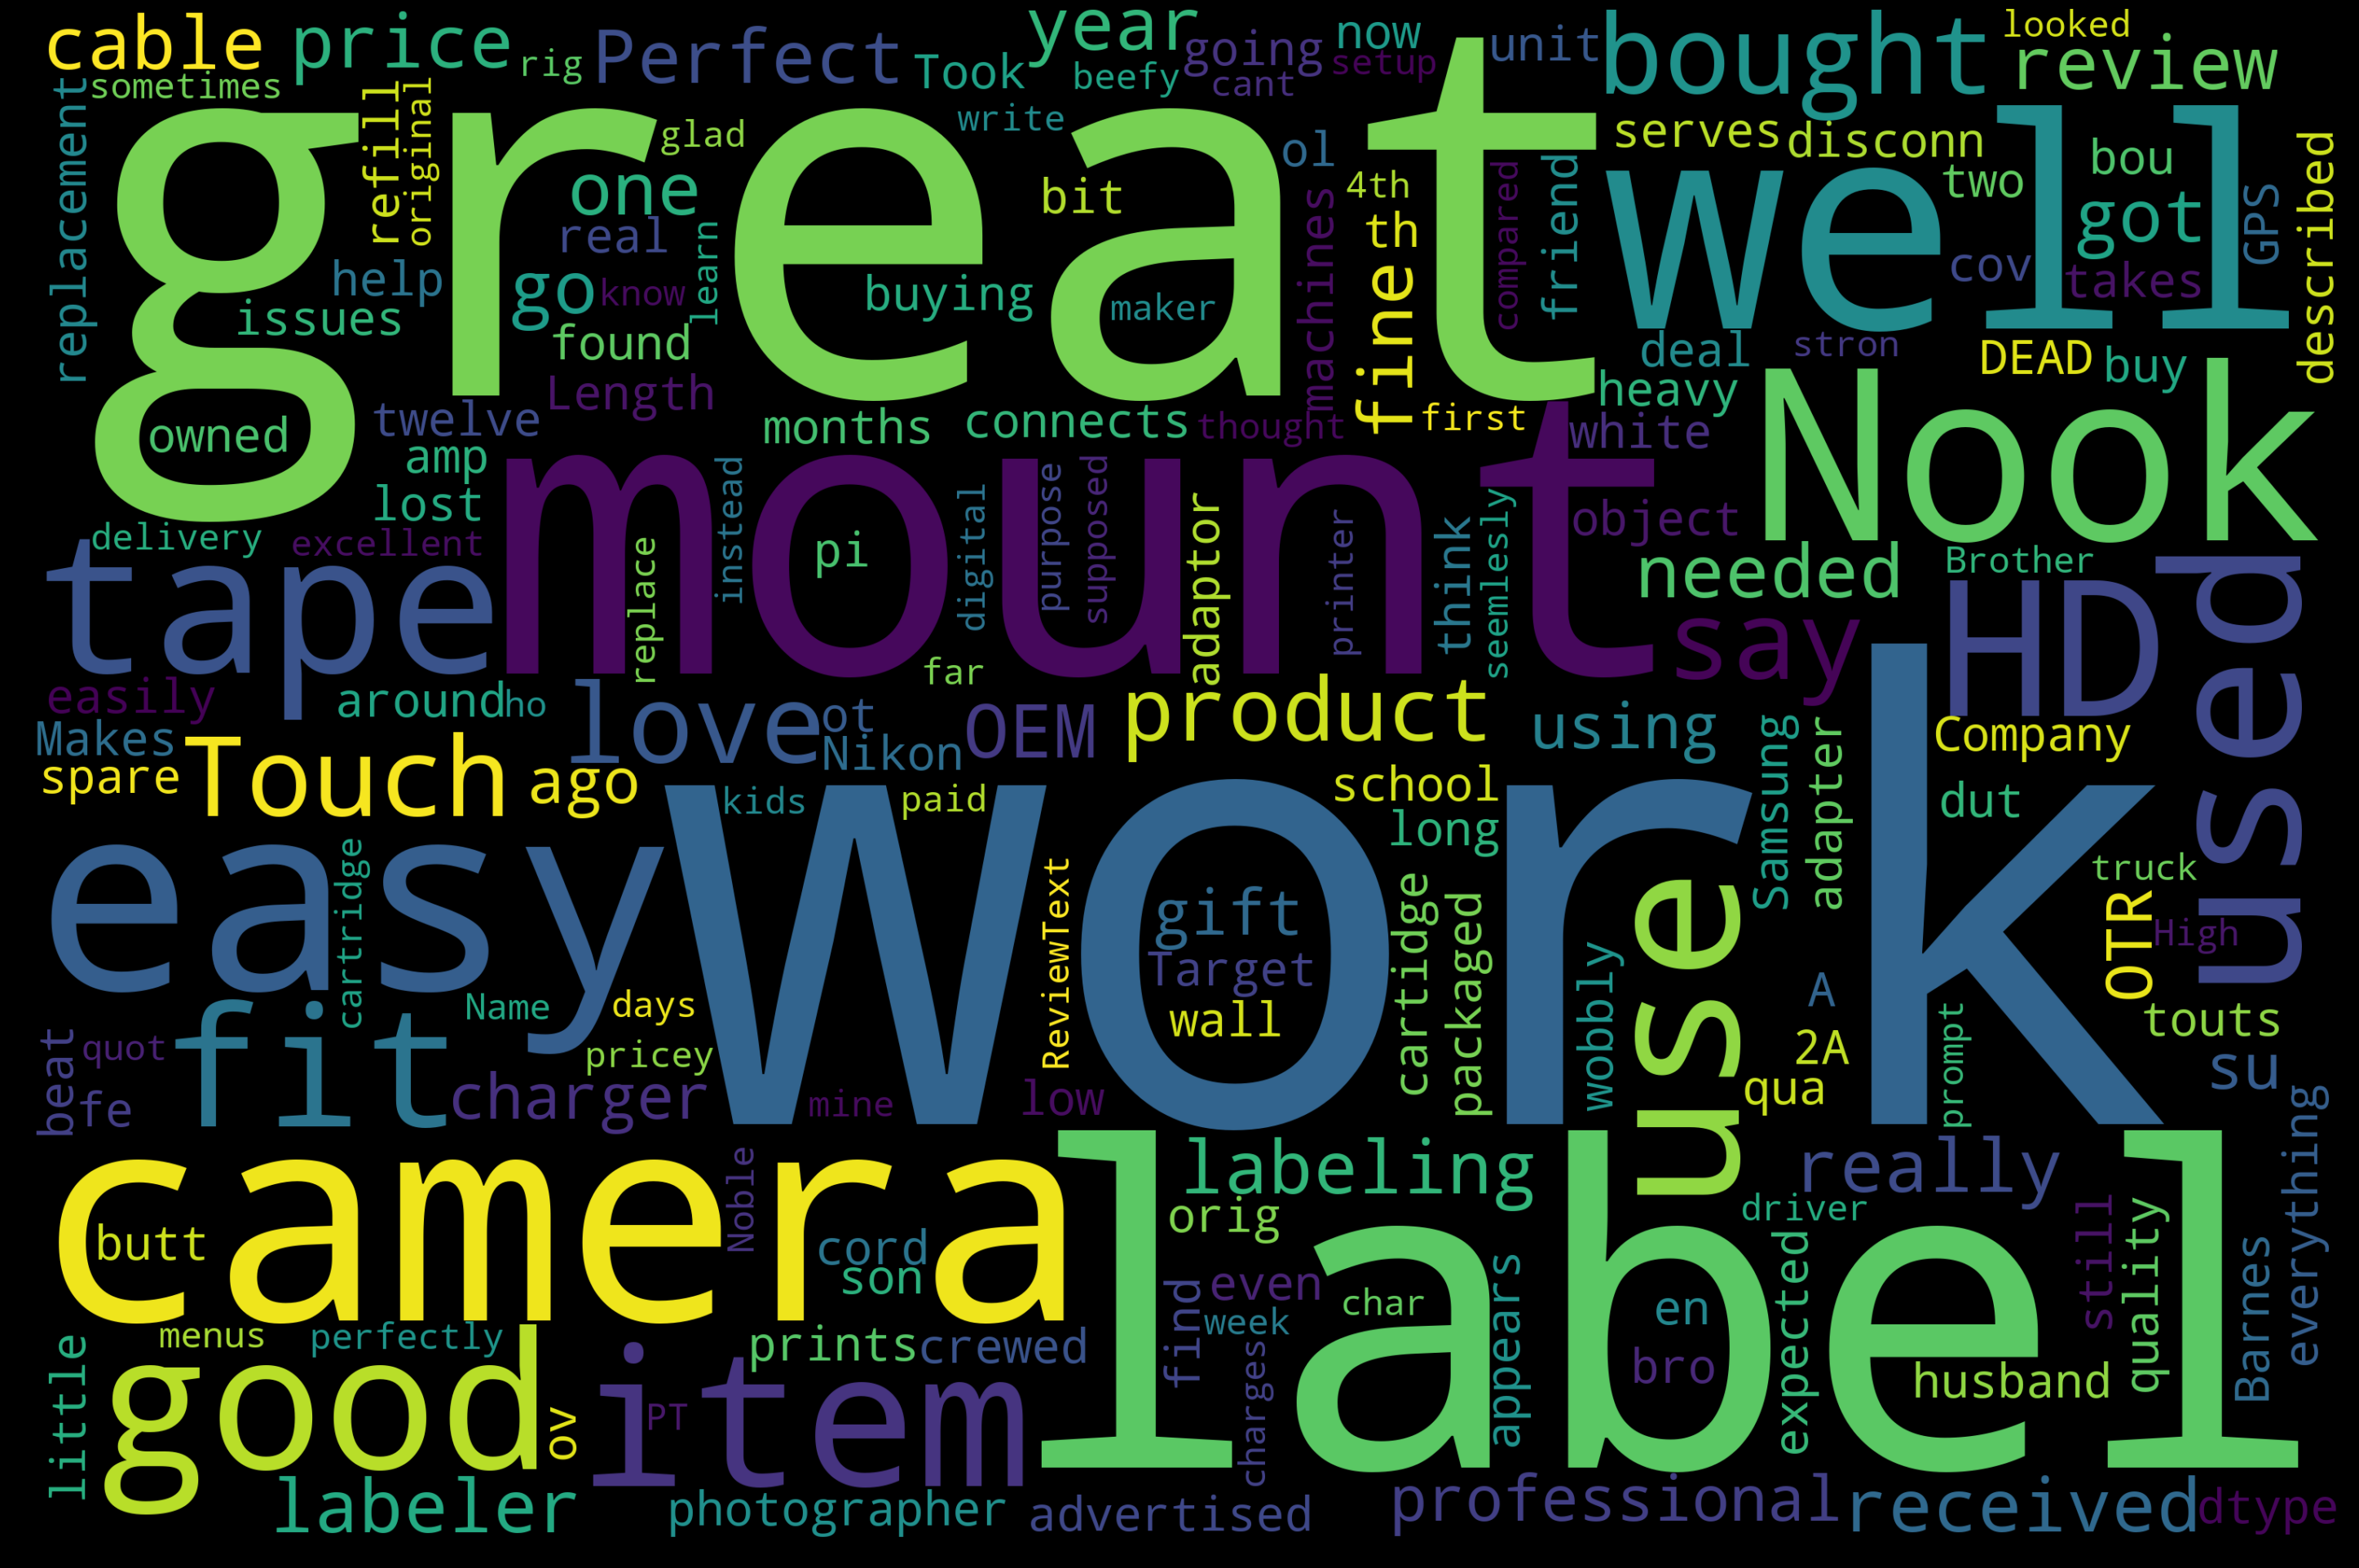

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = data['ReviewText']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()